Carrega os pacotes e bibliotecas necessárias.

In [333]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


Carrega o conjunto de dados

In [334]:
data_train = pd.read_csv("train.csv", delimiter=',')
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Faz a média das idades para ser colocada nos dados faltantes

In [335]:

data_train['Age'] = data_train['Age'].fillna(data_train['Age'].mean())


Binariza a coluna Cabin

In [336]:
data_train['Cabin'].fillna(0, inplace=True)
data_train['Cabin'] = data_train['Cabin'].apply(lambda x: 1 if x != 0 else 0)

Filtra apenas as features importantes

In [337]:
features = ["Pclass", "Sex", "Parch", "Age", "Cabin"]
x_train = pd.get_dummies(data_train[features])
x_train

,Pclass,Parch,Age,Cabin,Sex_female,Sex_male
0,3,0,22.000000,0,0,1
1,1,0,38.000000,1,1,0
2,3,0,26.000000,0,1,0
3,1,0,35.000000,1,1,0
4,3,0,35.000000,0,0,1
...,...,...,...,...,...,...
886,2,0,27.000000,0,0,1
887,1,0,19.000000,1,1,0
888,3,2,29.699118,0,1,0
889,1,0,26.000000,1,0,1


Filtra as labels

In [338]:
y_train = data_train["Survived"]
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Divide os conjuntos de treino, teste e validação

In [339]:
X_train,X_test,Y_train,Y_test=train_test_split(x_train, y_train,
test_size=0.2, random_state=84)

In [340]:
X_train,X_val,Y_train,Y_val=train_test_split(X_train, Y_train,
test_size=0.1, random_state=84)

In [341]:
hidden = [1,2,3]
hidden_size = [16,32,64]
accuracy = []

Prepara um callback para o treino parar após 3 valores de loss não tiverem uma mudança de 0.0005. Treina vários modelos com número de camadas e neurônios diferentes. Ploca o gráfico de acc e loss para cada treino e avalia com os dados de teste. O melhor foi uma camada oculta com 32 neurônios.

3/3 [==============================] - 0s 4ms/step


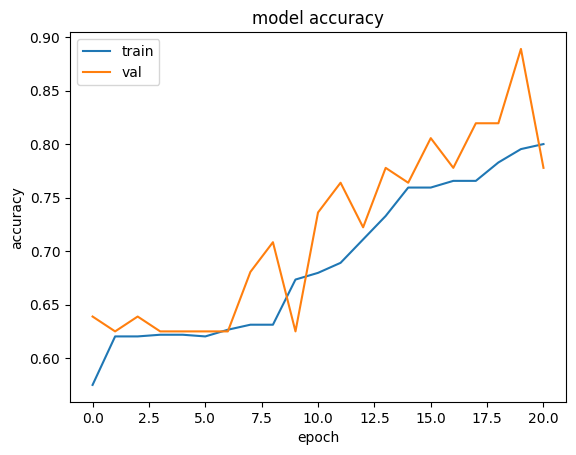

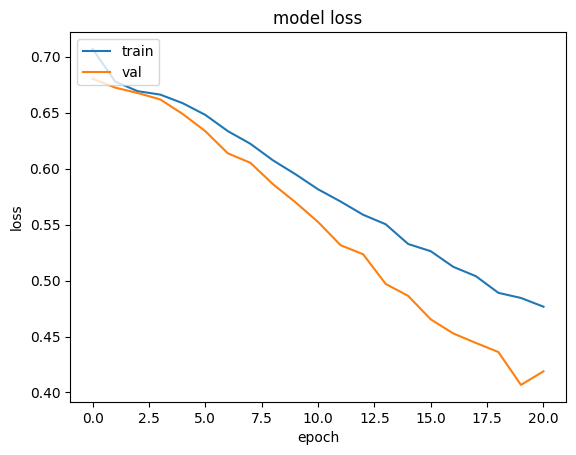

3/3 [==============================] - 0s 5ms/step - loss: 0.5149 - accuracy: 0.7374
test loss, test acc: [0.5148984789848328, 0.7374301552772522]
3/3 [==============================] - 0s 4ms/step


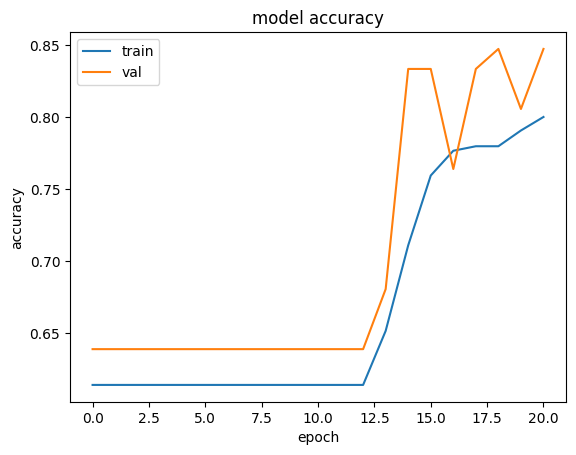

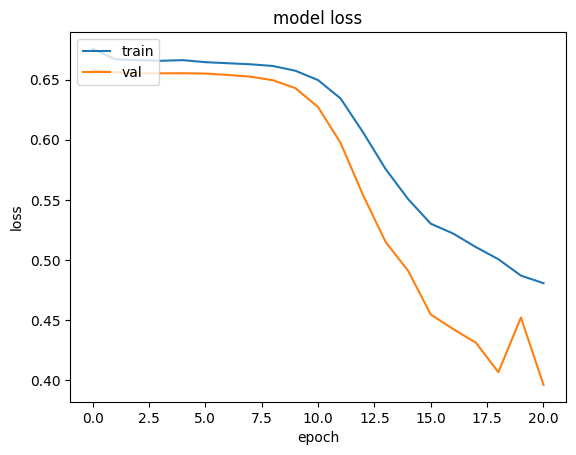

3/3 [==============================] - 0s 6ms/step - loss: 0.5178 - accuracy: 0.7542
test loss, test acc: [0.5177780985832214, 0.7541899681091309]
3/3 [==============================] - 0s 5ms/step


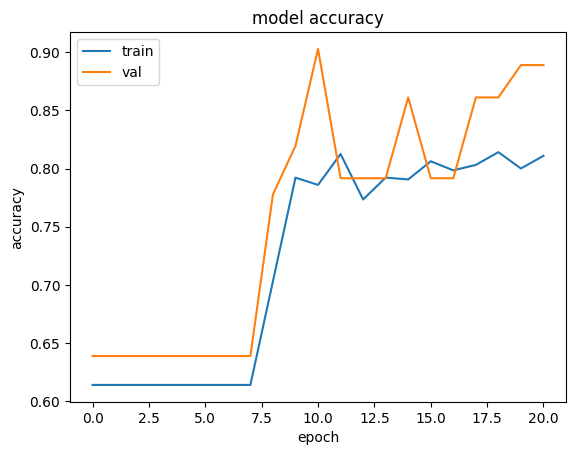

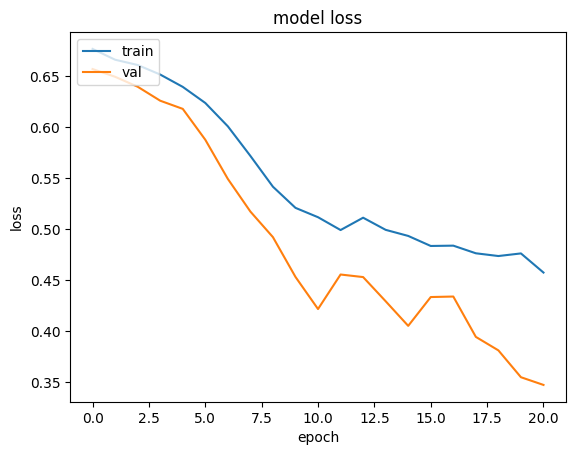

3/3 [==============================] - 0s 6ms/step - loss: 0.5213 - accuracy: 0.7709
test loss, test acc: [0.5212756395339966, 0.7709497213363647]
3/3 [==============================] - 0s 5ms/step


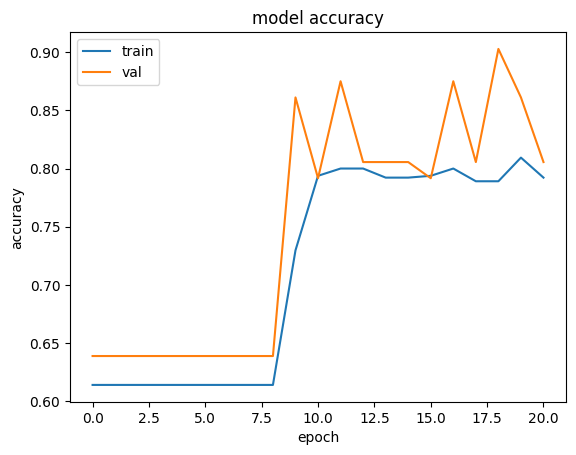

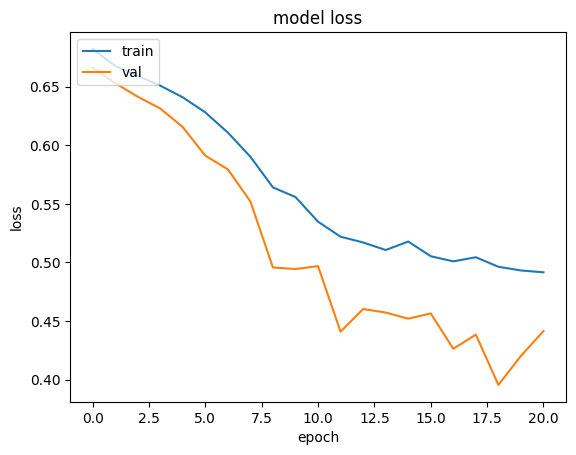

3/3 [==============================] - 0s 6ms/step - loss: 0.5390 - accuracy: 0.7430
test loss, test acc: [0.5390281677246094, 0.74301677942276]
3/3 [==============================] - 0s 5ms/step


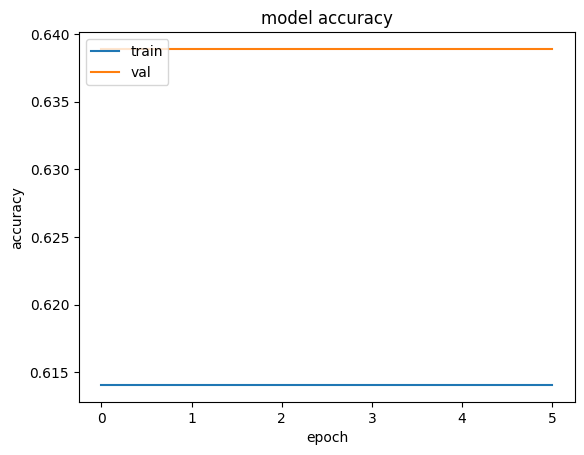

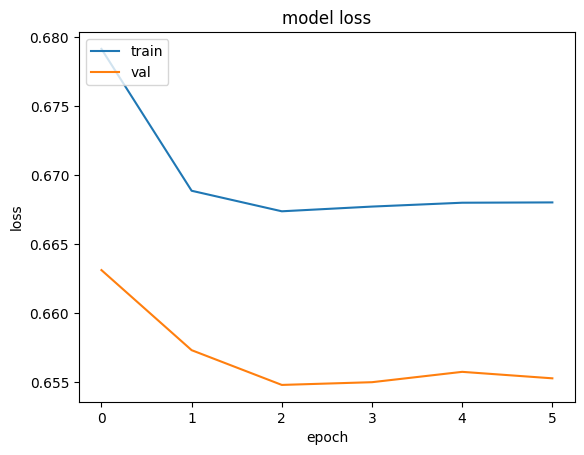

3/3 [==============================] - 0s 6ms/step - loss: 0.6667 - accuracy: 0.6145
test loss, test acc: [0.6666793823242188, 0.6145251393318176]
3/3 [==============================] - 0s 4ms/step


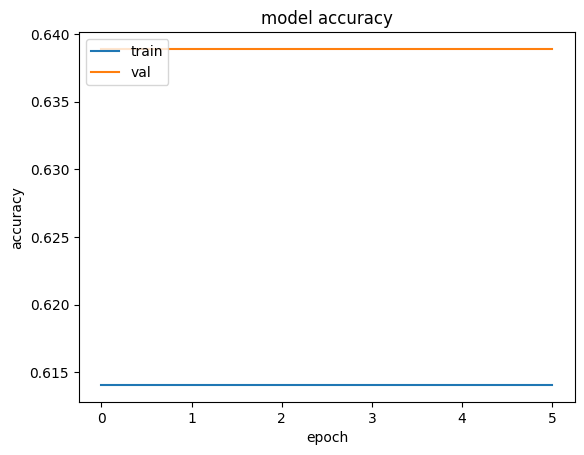

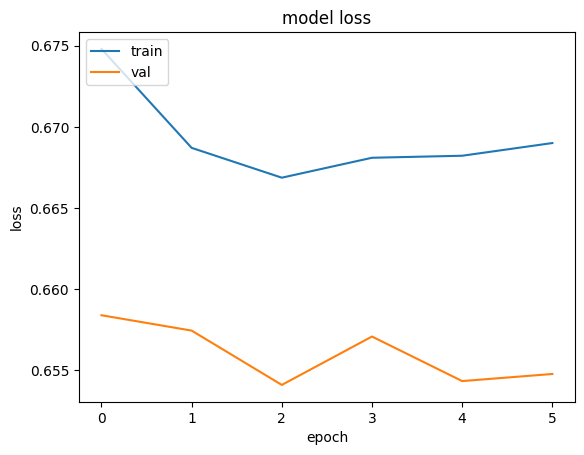

3/3 [==============================] - 0s 6ms/step - loss: 0.6668 - accuracy: 0.6145
test loss, test acc: [0.6667675971984863, 0.6145251393318176]
3/3 [==============================] - 0s 4ms/step


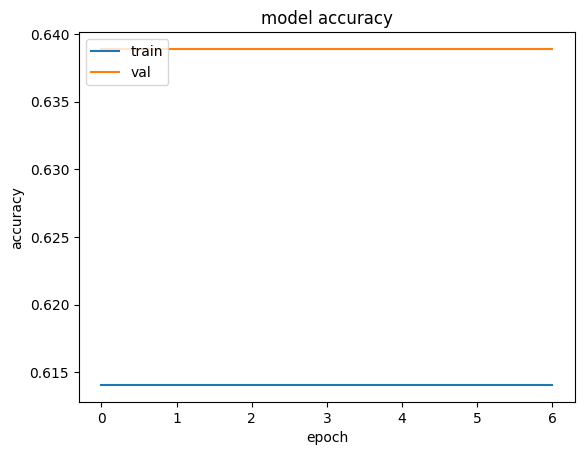

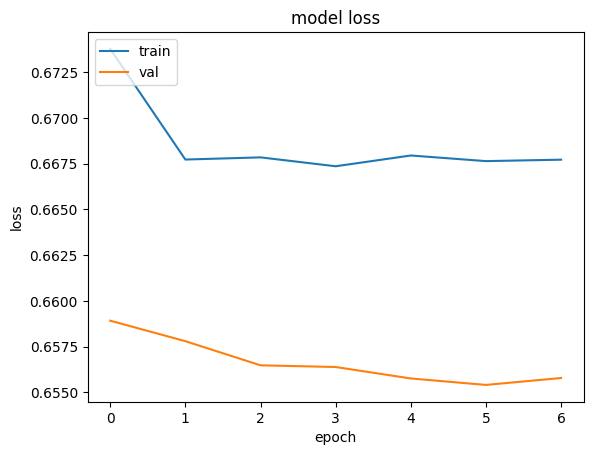

3/3 [==============================] - 0s 8ms/step - loss: 0.6667 - accuracy: 0.6145
test loss, test acc: [0.6667178869247437, 0.6145251393318176]
3/3 [==============================] - 0s 5ms/step


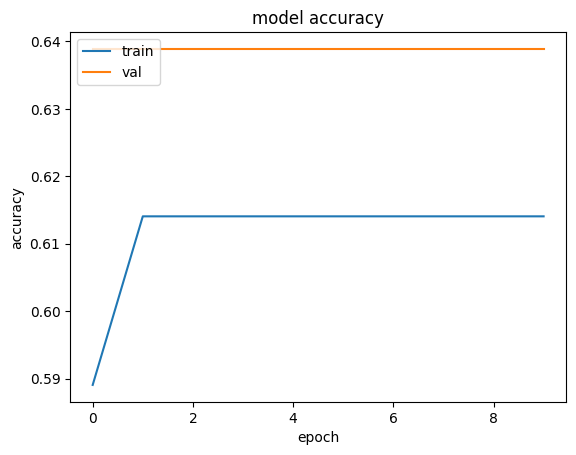

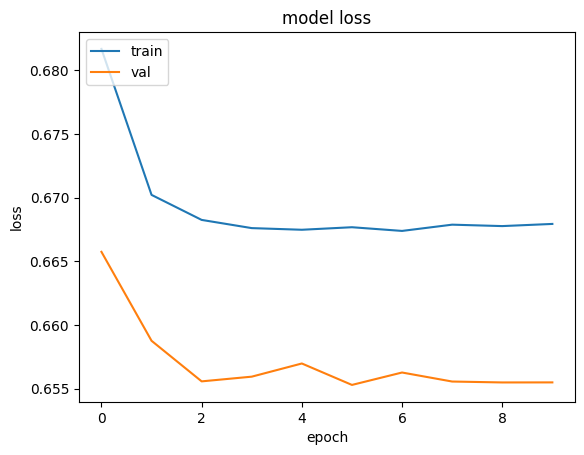

3/3 [==============================] - 0s 7ms/step - loss: 0.6667 - accuracy: 0.6145
test loss, test acc: [0.666686475276947, 0.6145251393318176]
3/3 [==============================] - 0s 5ms/step


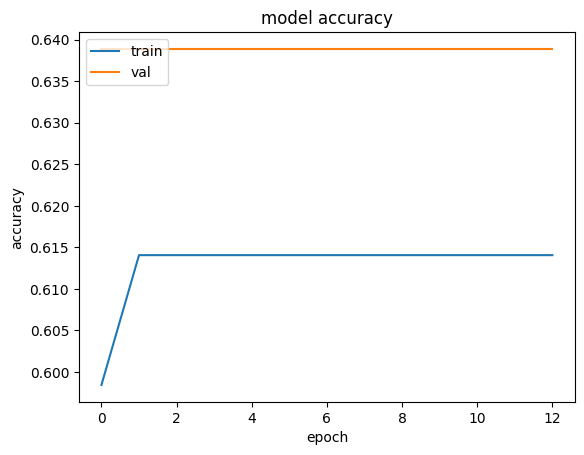

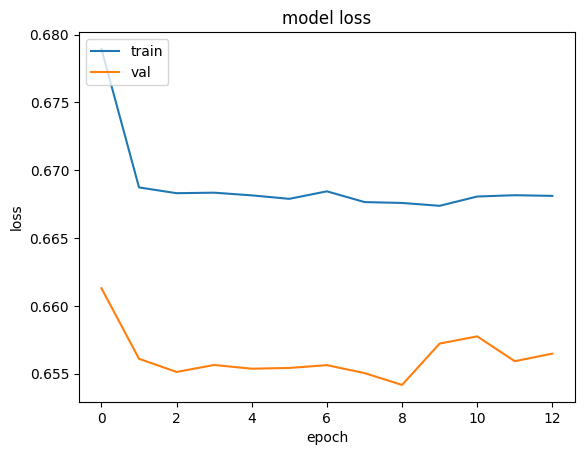

3/3 [==============================] - 0s 8ms/step - loss: 0.6669 - accuracy: 0.6145
test loss, test acc: [0.6668710708618164, 0.6145251393318176]


In [342]:
model = Sequential()
tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0005,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
for h in hidden:
  for hs in hidden_size:
    for ah in hidden:
      model.add(Dense(hs, activation='relu'))   
    model.add(Dense(1,  activation="sigmoid"))
    model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=["accuracy"])
    history = model.fit(X_train, Y_train, epochs=21, batch_size=32, validation_data=(X_val, Y_val), callbacks=[callback], verbose =0)
    y_pred = model.predict(X_val)
    y_pred_binary = (y_pred > 0.5).astype(int)
    accuracy.append(accuracy_score(Y_val, y_pred_binary)) 
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    results = model.evaluate(X_test, Y_test, batch_size=64)
    print("test loss, test acc:", results)


In [343]:
accuracy


[0.7777777777777778,
 0.8472222222222222,
 0.8888888888888888,
 0.8055555555555556,
 0.6388888888888888,
 0.6388888888888888,
 0.6388888888888888,
 0.6388888888888888,
 0.6388888888888888]